# PyVet 🐍

## VA Facilities

Using `pyvet`, we can quickly fetch <a href="https://developer.va.gov/">VA facilities data</a> and extract useful data points. Below we query using a `bbox`, and then we fetch all VA facilities and sort them with best avg veteran satisfaction scores across reported departments. Finally, we report the average satisfaction score across the nation.

In [9]:
import operator
import numpy as np

from pyvet.facilities.api import (
    get_all,
    get_ids,
    get_nearby,
    get_facilities_by_query,
    get_facility,
)
from pprint import pprint

hawaii_vas = get_nearby(
    latitude=21.315603,
    longitude=-157.858093,
    drive_time=60, # optional
)
# queried_facilities = get_facilities_by_query(
#     latitude=34.42,
#     longitude=-77.54,
#     facility_type="health",
#     services=[],
# ).get('data')

all_facilities = get_all()



va_scores = []

for va in all_facilities.get('features'):
    va_address = va.get('properties').get('address').get('physical').get('address_1')
    va_city = va.get('properties').get('address').get('physical').get('city')
    va_state = va.get('properties').get('address').get('physical').get('state')
    va_name = va.get('properties').get('name')
    va_satisfaction = va.get('properties').get('satisfaction')
    va_health = va.get('properties').get('satisfaction').get('health')
    if va_health:
        num_va_departments = len(va_health) if va_health else 0
        va_avg_satisfaction = np.mean(list(va.get('properties').get('satisfaction').get('health').values()))
        # ignore va facilities that don't have satisfaction scores yet
        if not np.isnan(va_avg_satisfaction):
            va_scores.append((va_name, f'{va_city}, {va_state}', va_avg_satisfaction))

# pprint(
#     sorted(
#         va_scores, key=operator.itemgetter(2), reverse=True
#     )
# )

only_scores = [s[2] for s in va_scores]
print(f'Nationwide avg satisfaction score = {np.mean(only_scores)} (out of {len(only_scores)} VA facilities)')

Nationwide avg satisfaction score = 0.6383447045989242 (out of 1026 VA facilities)


Now, let's get the best satisfaction score in each state.

In [2]:
from collections import defaultdict

vas_in_states = defaultdict(list)
# ('Norfolk VA Clinic', 'Norfolk, NE', 0.8899999856948853),
# here we build the above
for va in va_scores:
    va_state = va[1][-2:]
    vas_in_states[va_state].append(va)

# pprint(vas_in_states)

# now let's get the highest in each state
best_state_scores = []
for k, v in vas_in_states.items():
    best_va = "Not Found"
    best_score = float("-inf")
    for va in v:
        curr_score = va[-1]
        if curr_score > best_score:
            best_score = curr_score
            best_va = va[0]
    print(f"Best VA in {k}: {best_va} with a score of {curr_score}.")
    best_state_scores.append((best_va, curr_score))
    

    
pprint(sorted(best_state_scores, key=operator.itemgetter(1), reverse=True))

Best VA in ME: Rumford VA Clinic with a score of 0.8549999892711639.
Best VA in VT: Burlington Lakeside VA Clinic with a score of 0.0.
Best VA in NH: Manchester VA Medical Center with a score of 0.4099999964237213.
Best VA in MA: Quincy VA Clinic with a score of 0.9149999916553497.
Best VA in RI: Providence VA Medical Center with a score of 0.47999998927116394.
Best VA in CT: John J. McGuirk Department of Veterans Affairs Outpatient Clinic with a score of 0.0.
Best VA in MI: Cheboygan County VA Clinic with a score of 0.9550000131130219.
Best VA in OH: Lima VA Clinic with a score of 0.4749999940395355.
Best VA in KY: Prestonsburg VA Clinic with a score of 0.36000001430511475.
Best VA in IN: Bloomington VA Clinic with a score of 0.4300000071525574.
Best VA in IL: Decatur VA Clinic with a score of 0.46000000834465027.
Best VA in WI: Wausau VA Clinic with a score of 0.4749999940395355.
Best VA in MO: Nevada VA Clinic with a score of 0.7549999952316284.
Best VA in KS: Robert J. Dole Departm

In [6]:
# or just get nearby VA facilities and export it to a csv file
nearby_facilities = get_nearby(
    latitude=42.361145,
    longitude=-71.057083,
    drive_time=60, # optional
)
nearby_facilities

{'data': [{'id': 'vha_523BZ',
   'type': 'nearby_facility',
   'attributes': {'min_time': 0, 'max_time': 10}},
  {'id': 'vha_523',
   'type': 'nearby_facility',
   'attributes': {'min_time': 10, 'max_time': 20}},
  {'id': 'vha_523GC',
   'type': 'nearby_facility',
   'attributes': {'min_time': 10, 'max_time': 20}},
  {'id': 'vha_518',
   'type': 'nearby_facility',
   'attributes': {'min_time': 20, 'max_time': 30}},
  {'id': 'vha_518GA',
   'type': 'nearby_facility',
   'attributes': {'min_time': 20, 'max_time': 30}},
  {'id': 'vha_523A4',
   'type': 'nearby_facility',
   'attributes': {'min_time': 20, 'max_time': 30}},
  {'id': 'vha_523A5',
   'type': 'nearby_facility',
   'attributes': {'min_time': 30, 'max_time': 40}},
  {'id': 'vha_523BY',
   'type': 'nearby_facility',
   'attributes': {'min_time': 30, 'max_time': 40}},
  {'id': 'vha_523GA',
   'type': 'nearby_facility',
   'attributes': {'min_time': 30, 'max_time': 40}},
  {'id': 'vha_518GB',
   'type': 'nearby_facility',
   'attri

In [10]:
from pprint import pprint
# here we fetch each hawaii_vas VA's data
hawaiivas = []
for va in hawaii_vas.get('data'):
    current_va = get_facility(f_id=va.get('id')).get('data').get('attributes')
    hawaiivas.append(current_va)
    print("===================================")
    print(f"VA name: {current_va.get('name')}")
    pprint(current_va.get('satisfaction'))

VA name: Spark M. Matsunaga Department of Veterans Affairs Medical Center
{'effective_date': '2022-06-28',
 'health': {'primary_care_routine': 0.8600000143051147,
            'primary_care_urgent': 0.7900000214576721,
            'specialty_care_routine': 0.8299999833106995,
            'specialty_care_urgent': 0.7200000286102295}}
VA name: Leeward Oahu VA Clinic
{'effective_date': '2022-06-28',
 'health': {'primary_care_routine': 0.9200000166893005,
            'primary_care_urgent': 0.9300000071525574}}
VA name: Windward VA Clinic
{'effective_date': None, 'health': {}}


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

hawaiivas

[{'name': 'Spark M. Matsunaga Department of Veterans Affairs Medical Center',
  'facility_type': 'va_health_facility',
  'classification': 'VA Medical Center (VAMC)',
  'website': 'https://www.va.gov/pacific-islands-health-care/locations/spark-m-matsunaga-department-of-veterans-affairs-medical-center/',
  'lat': 21.36125048,
  'long': -157.88887764,
  'time_zone': 'Pacific/Honolulu',
  'address': {'mailing': {},
   'physical': {'zip': '96819-1522',
    'city': 'Honolulu',
    'state': 'HI',
    'address_1': '459 Patterson Road',
    'address_2': None,
    'address_3': None}},
  'phone': {'fax': '808-433-0390',
   'main': '800-214-1306',
   'pharmacy': '800-214-1306 x1',
   'after_hours': '800-214-1306 x3',
   'patient_advocate': '808-433-0126',
   'mental_health_clinic': '808-433-0660',
   'enrollment_coordinator': '800-214-1306 x4',
   'health_connect': None},
  'hours': {'monday': '24/7',
   'tuesday': '24/7',
   'wednesday': '24/7',
   'thursday': '24/7',
   'friday': '24/7',
   'sa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


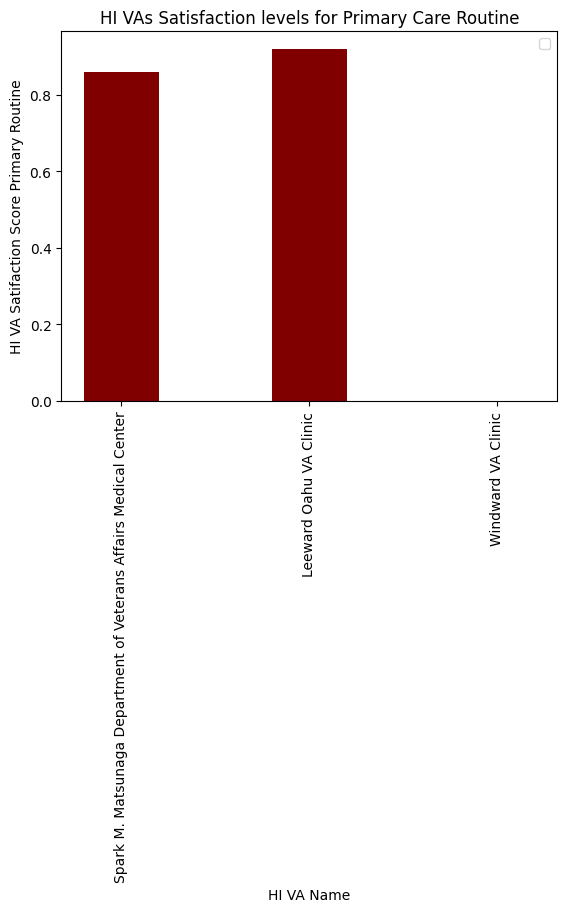

In [12]:
hawaii_dic = [(h.get('name'), h.get('satisfaction').get('health').get('primary_care_routine', 0.0)) for h in hawaiivas]
hawaii_dic
x = [v[0] for v in hawaii_dic]
y = [v[1] for v in hawaii_dic]
plt.xlabel("HI VA Name")
plt.ylabel("HI VA Satifaction Score Primary Routine")
plt.title("HI VAs Satisfaction levels for Primary Care Routine")
plt.legend()
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90)
plt.show()

## VA Forms

In [13]:
from pyvet.forms.api import get_form, get_forms

# Now, let's get some forms

from pprint import pprint

va_forms = get_forms().get('data')

va_forms


va_forms_titles = [v.get('attributes').get('title') for v in va_forms]

print(f"Total number of VA forms = #{len(va_forms_titles)}")
print("printing forms...")
pprint(va_forms_titles)

Total number of VA forms = #731
printing forms...
["Individuals' Request for a Copy of Their Own Health Information",
 'Your Rights to Appeal Our Decision—Contested Claims',
 'Financial Status Report',
 'CHAMPVA Benefits Election Affirmation',
 'International Direct Deposit Enrollment (Fillable)',
 'Your Rights to Appeal our Decision',
 'Application for Burial Benefits',
 'Supp Info for Chg of Prog or Reenroll After Unsat  Attend, Condt or Progress '
 '(F)',
 'Your Rights To Appeal Our Decision',
 'Your Rights to Representation and a Hearing (Possible Overpayment)',
 'Health Care Personnel Influenza Vaccination Form Appendix B',
 'Your Rights to Appeal Our Decision',
 'VA Geriatrics and Extended Care (GEC) Referral',
 'Housing Relief Request (Colmery Act Sections 107/501)',
 'Civil Rights Discrimination Complaint',
 'Claim for Reimbursement of Travel Expenses',
 'Application for Burial Benefits',
 '35% Exemption Request From 85/15 Reporting Requirement (Fillable)',
 'Certification of C

## VA Confirmation

In [15]:
from pyvet.veteran.confirmation.api import get_status

status = get_status(
    first_name="Alfredo",
    last_name="Armstrong",
    birth_date="1993-06-08",
    middle_name="M",
    gender="M",
    street_address="17020 Tortoise St",
    city="Round Rock",
    zip_code="78664",
    state="TX",
    country="USA",
    home_phone_number="555-555-5555",
    mothers_maiden_name="Smith",
    birth_place_city="Johnson City",
    birth_place_state="MA",
    birth_place_country="USA",
)
print(status)

{'id': '1005490754', 'veteran_status': 'confirmed'}


In [19]:
from pprint import pprint
from pyvet.health.provider.api import (
    get_location,
    get_location_by_id,
    get_organization,
    get_organization_by_id,
    get_practitioner,
    get_practitioner_by_id,
    get_practitioner_role,
    get_practitioner_role_by_id,
)


pprint(
    get_practitioner_by_id(resource_id="I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000")
)

{'active': True,
 'address': [{'city': 'CHEYENNE',
              'line': ['555 E 5TH ST', 'SUITE B'],
              'period': {'end': '2015-04-02', 'start': '2010-01-01'},
              'postalCode': '82001',
              'state': 'WYOMING'}],
 'birthDate': '1964-02-23',
 'gender': 'female',
 'id': 'I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000',
 'identifier': [{'assigner': {'display': 'Master Patient Index'},
                 'system': 'http://va.gov/mpi',
                 'type': {'coding': [{'code': 'MR',
                                      'system': 'http://terminology.hl7.org/CodeSystem/v2-0203'}]},
                 'use': 'usual',
                 'value': '1015517260V990420'},
                {'system': 'http://hl7.org/fhir/sid/us-npi',
                 'value': '1932127842'}],
 'meta': {'lastUpdated': '2015-07-04T12:50:12Z'},
 'name': [{'family': 'DOE922',
           'given': ['JANE460'],
           'prefix': ['DR.'],
           'suffix': ['MD']}],
 'qualifica

In [3]:
pprint(
    get_location(resource_id="I2-JI7HH7SBZOCSIS7F7DI6BLHY4VNVELJM77KAYURLD5ZZWRQ2EY7Q0000")
)

print("========================================================================================")

pprint(
    get_location_by_id(resource_id="I2-JI7HH7SBZOCSIS7F7DI6BLHY4VNVELJM77KAYURLD5ZZWRQ2EY7Q0000")
)

{'entry': [{'fullUrl': 'https://sandbox-api.va.gov/services/provider-directory/v0/r4/Location/I2-JI7HH7SBZOCSIS7F7DI6BLHY4VNVELJM77KAYURLD5ZZWRQ2EY7Q0000',
            'resource': {'address': {'city': 'LYONS',
                                     'line': ['151 KNOLLCROFT ROAD'],
                                     'postalCode': '07939',
                                     'state': 'NJ',
                                     'text': '151 KNOLLCROFT ROAD LYONS NJ '
                                             '07939'},
                         'description': 'VISUAL IMPAIRMENT SVCS OUTPATIENT '
                                        'REHAB (VISOR)',
                         'id': 'I2-JI7HH7SBZOCSIS7F7DI6BLHY4VNVELJM77KAYURLD5ZZWRQ2EY7Q0000',
                         'managingOrganization': {'display': 'LYONS VA MEDICAL '
                                                             'CENTER',
                                                  'reference': 'https://sandbox-api.va.gov/servi

In [20]:
pprint(
    get_practitioner(resource_id="I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000")
)

print("========================================================================================")

pprint(
    get_practitioner_by_id(resource_id="I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000")
)

{'entry': [{'fullUrl': 'https://sandbox-api.va.gov/services/provider-directory/v0/r4/Practitioner/I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000',
            'resource': {'active': True,
                         'address': [{'city': 'CHEYENNE',
                                      'line': ['555 E 5TH ST', 'SUITE B'],
                                      'period': {'end': '2015-04-02',
                                                 'start': '2010-01-01'},
                                      'postalCode': '82001',
                                      'state': 'WYOMING'}],
                         'birthDate': '1964-02-23',
                         'gender': 'female',
                         'id': 'I2-VLZYJVF7MOB2SFAKTAPNSQIBWZS22HGVT3A56E5D5PHDUWJGQIGQ0000',
                         'identifier': [{'assigner': {'display': 'Master '
                                                                 'Patient '
                                                            